# Building a Model to Predict Housing Prices

### Nicolás Gallardo
#### Certificate in Data Engineer Student


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The main goal of this project was to improve the linear regression model created in video 7.9 of this module, which was about creating a model to predict a housing price. In order to do so, the target variable, that was the sale price of the housing, was transformed into a logarithmic scaled target. Also, many more independent variables were used to achieve that, in contrast of the few ones used in the example video. This way, a linear regression model that had an R-Squared score of 0.811 when tested against the test data was achieved. 

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

For the creation of this project, the first step is to import the data using the pandas library. Then, an exploration of the data will be done in order to understand how the data behaves. An exploration of the target variable will be done using histograms and seeing how the skewness of that target is. It will be shown how using a logarithmic scale can change the skewness of a right-tailed distribution. Also, a search for NaN values will take place. After that, it will be explored through scatterplot how related the variables are with the target. 

Next, it will be used a heatmap plot to easily explore the correlation of the target with the rest of the variables. Also, it will be explained the theory behind the correlation, and the important Pearson's correlation coefficient statistic score.

After that, the theory of the linear regression model will be covered: the roots of it, the differences with the correlation, and how it is calculated from a mathematical point of view. It will also be covered what is the coding to create a linear regression model through sklearn. After that the creation of three different models with different variables will be done, and one of the main differences will be in the outcome of treating the target when it's not normally distributed. A test sample data will be used to test the models and explore the different outcomes and conclude about the process. 

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

Before starting this project, the next script will be run to get the plots of this project shown in the middle of the notebook, for a better appreciation of this project. 



In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

To begin with the process of constructing this project, the data is imported from a csv file where the data is located. The pandas function *read_csv* is used to create a dataframe to work within the Python language.

In order not to change the data from the source, it is used another dataframe created from the original source to work and transform the data. The *iloc* function is used to slice the portion of the dataframe that will be used.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/houseSmallData.csv')

train = df.iloc[0:100,1:]

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


The data presented in the above cell is the one that will be worked to create a model to predict the housing sale price within this framework. The rows represent the values of the data, while the columns indicate the attributes used in this database. The attributes include different characteristics of a property and its environment: they include information about the neighborhood, the commodities within the property, the type of construction of it, the area of the property, the quality of the different features, etc. To see the details and the description of the data, it can be found in the data folder of this project. 

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

The most important variable that will be used in this model is the sale price of the property, because it's the target and the variable that will let the model predict that price of the different properties. 

In this case, it would be important to show how the data of SalePrice is distributed. In order to show the histogram, the library *MatPlotLib* is used to create a histogram.

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

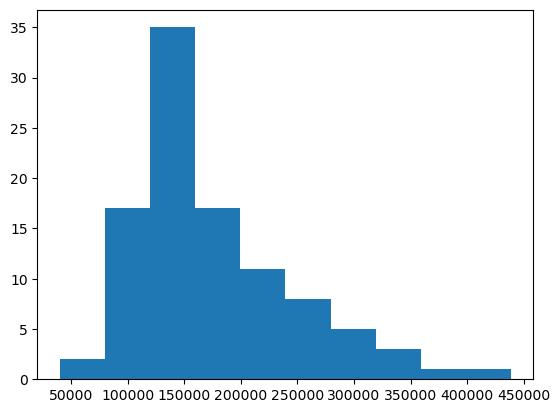

In [3]:
import matplotlib.pyplot as plt

salePrice = train['SalePrice']
plt.hist(salePrice)


As can be seen in the graph above, the data is not normally distributed, and there is a right-tailed showing in the distribution. It should be a positive skewness, and it will be calculated to confirm it.

In [4]:
salePrice.skew()

1.1783462304851948

To work around this problem, one of the methods used to transform the data and make it more normally distributed, it's to transform this data into a logarithmic scale due to its compactable nature. The library *numpy* will be used to transform the data into a natural logarithmic scale.

(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

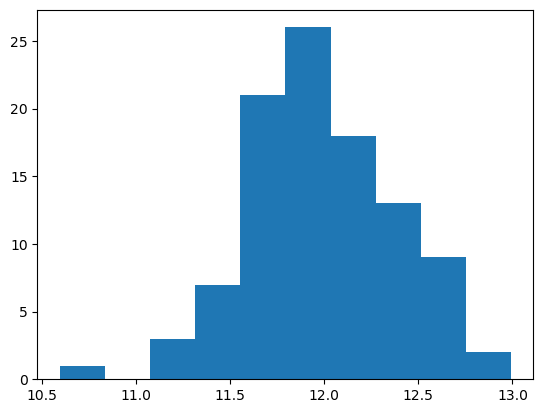

In [5]:
plt.hist(np.log(salePrice))


In [6]:
np.log(salePrice).skew()

-0.09632240207755555

As it is shown above, the skewness is closer to zero, making the data more naturally distributed, or fitter to a Gaussian distribution. This is helpful in creating a machine learning algorithm that uses linear regression, because having a tailed or skewed data can be harmful to the statistical model, because the tail can be interpreted as outliers, affecting the performance of the model.  

Another important step is to see how is the relationship between the other variables and the target variable SalePrice. A good way to see the relationship is through scatter plots, that show the relationship between two variables, where the data should be linear between both variables, showing a correlation between them. 

An example, would be to scatter SalePrice against OverallQual. The function *scatter* from *MatplotLib* will be used to create this plot.

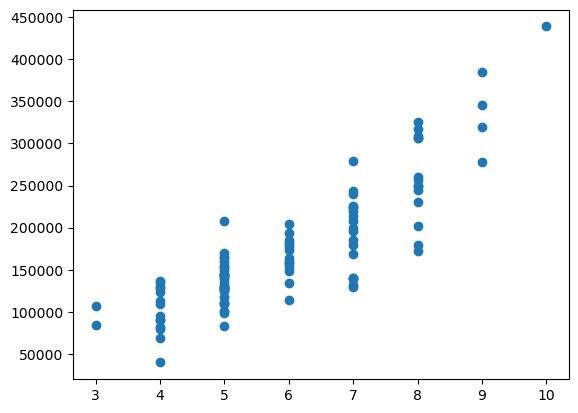

In [7]:
plt.scatter(train['OverallQual'],y=salePrice)

It is shown in the graph above that there is a correlation between these two variables, and that there is a positive linearity. 

On the other hand, it is hard to notice a good correlation between the target variable and the BsmtFullBath variable. 

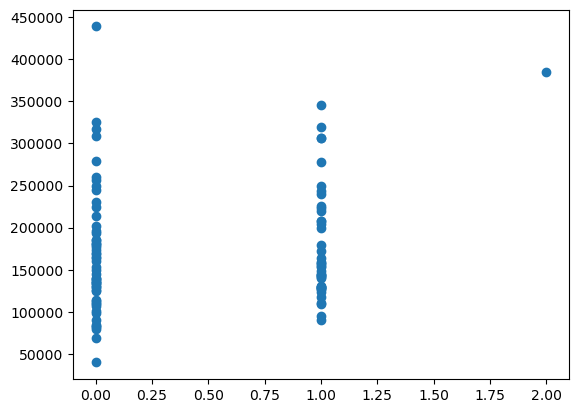

In [8]:
plt.scatter(train['BsmtFullBath'],y=salePrice)

How to interpret the correlation of the variables will be detailed in depth in *section 2.4*. 

Another exploration that can be done, it is to determine what is the shape and numeric variables, since these are the ones that are going to be explored.

In [9]:
train.shape

(100, 81)

In [10]:
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(100, 39)

Out of the 81 columns included in this dataframe, only 39 are numeric. 


[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


It is important to understand that NaN values make it impossible to create a linear regression model. The next step is to list how many NaN values are in every column.

In [11]:
numeric.isna().sum().sort_values(ascending=False)[0:5]

PoolQC         100
LotFrontage     14
GarageYrBlt      6
Id               0
OpenPorchSF      0
dtype: int64

It is easy to point out that PoolQC is full of NaN values, so this is not a good variable to work with. LotFrontage and GarageYrBlt have NaN values. It is important to see a description of the data of these columns, to be able to make a decision in creating the filling process.

In [12]:
numeric['LotFrontage'].describe()

count     86.000000
mean      71.406977
std       21.093840
min       21.000000
25%       60.000000
50%       70.000000
75%       84.000000
max      122.000000
Name: LotFrontage, dtype: float64

In [13]:
numeric['GarageYrBlt'].describe()

count      94.000000
mean     1977.361702
std        26.604572
min      1900.000000
25%      1961.250000
50%      1979.000000
75%      2002.750000
max      2009.000000
Name: GarageYrBlt, dtype: float64

With the help of the *describe* function, it is easily extracted the mean of both variables. With the value of each mean, the NaN values are going to be replaced with the pandas *fillna* function. 

In [14]:
train['LotFrontage'] = train['LotFrontage'].fillna(71.406977)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1977.361702)

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

The correlation concept indicates the relationship between two variables. The correlation coefficient is a statistical numeric measure that ranges between -1 and 1, where the extremes represent a perfect strong relationship (which can be negative or positive) and 0 means no relationship between the two variables. 

The most common correlation coefficient is the Pearson's correlation coeficient. This is a measure of linear relationship, which is why it is used to test what variables can be useful to create a Linear Regression model.

To calculate it, the following expression is used:

$$r = \frac{1}{N}\sum_n\frac{x_n}{\sigma_x}\frac{y_n}{\sigma_y}.$$

In Python, the *pandas* library has a correlation function called *corr*() where this can be easily calculated in a whole column. 

Computing the correlation between SalePrice and the other variables is possible through the following code segment:

In [15]:
corr = numeric.corr()
correlations = corr['SalePrice'].sort_values(ascending=False)[0:10]

correlations

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
YearBuilt      0.658636
TotalBsmtSF    0.616297
GarageYrBlt    0.603635
FullBath       0.579505
MasVnrArea     0.571836
Name: SalePrice, dtype: float64

The top 10 variants that have the best correlation with the SalePrice variable are shown in the *pandas* series above. The OverallQual and GrLivArea are the ones wit the strongest correlation, but the rest are also showing positive correlation. 

A heatmap can be created with the *seaborn* library to create a plot that shows the correlation between all these variables. This is useful to have an idea in how the variables are related.  

<Axes: >

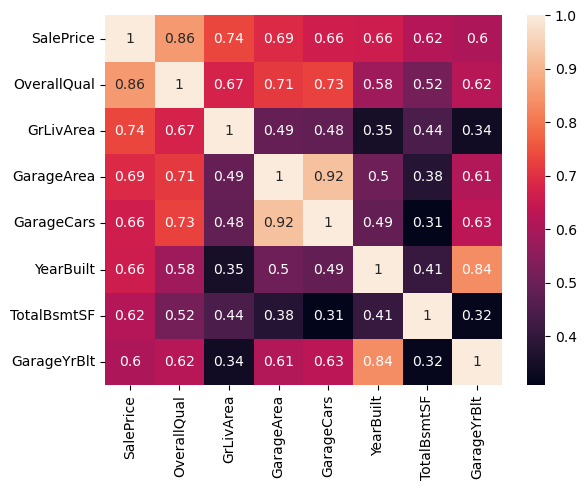

In [16]:
import seaborn as sns

sns.heatmap(numeric.loc[:,['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt']].corr(), annot = True)

As it was done in the beginning of this project, it was noted that the distribution of the SalePrice variable is not following a Gaussian type. To correct this, it was used a logarithmic transformation to scale it in a more compactable way. 

In the following step, the column of the SalePrice will be transformed into logarithmic values to see if the correlation between the other variables is better.

First, a function that transform numbers into natural logarithms will be defined.

In [17]:
def log(x):
    return np.log(x)

After defining the new function, the transformation of the column is done as the next step.

In [18]:
salePriceColumn = numeric['SalePrice']
logSalePrice = salePriceColumn.apply(log)
numeric['SalePrice'] = logSalePrice
numeric['SalePrice']

0     12.247694
1     12.109011
2     12.317167
3     11.849398
4     12.429216
        ...    
95    12.128111
96    12.273731
97    11.458997
98    11.326596
99    11.767180
Name: SalePrice, Length: 100, dtype: float64

The transformation is now done within the column. The new correlation coefficient between SalePrice and the other variables will be done as previously did without the logarithmic scale.

In [19]:
corr = numeric.corr()
correlations = corr['SalePrice'].sort_values(ascending=False)[0:10]

correlations

SalePrice       1.000000
OverallQual     0.843360
GrLivArea       0.700019
YearBuilt       0.698622
GarageArea      0.685404
GarageYrBlt     0.659546
GarageCars      0.658574
TotalBsmtSF     0.639880
YearRemodAdd    0.587051
FullBath        0.569660
Name: SalePrice, dtype: float64

From the *pandas* list can be extrated the conclusion that the correlation between the variables did not change importantly, but that does not mean that the linear regression won't be fitter for the logarithmic scaled target because it is more normally distibuted. 

Finally, another heatmap is created for the new scale.

<Axes: >

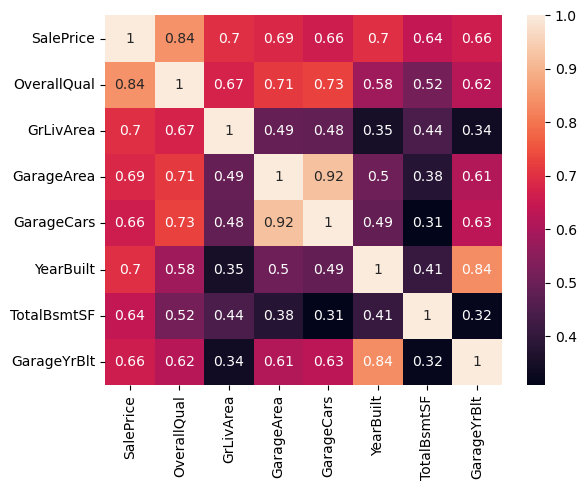

In [20]:
sns.heatmap(numeric.loc[:,['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt']].corr(), annot = True)


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


The improvement of the analysis, in this case, was creating the model using a logarithmic scaled targer through transformation of the variable, and using independent variables that had a Pearson score greater than 0.6 for the creation of the model (Top 9 correlated viarables compared the target). The model created with this information performed the best when tested with the test data (R-Squared of 0.811) . For comparison, a model created with the same independent variables but with the right-tailed target had an R-Squared score of 0.767 and a model using the logarithmic scaled target but only the top 2 independent variable had an R-Squared score of 0.706. The explanation will be detailed in depth in the following sections.

[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



Linear models are a class of models that are used in statistcs to predict an output given input features using a linear function to do so. 

**Simple linear regression** models explain the relationship between the magnitude of one variable and that of a second, being  correlation another way to measure the relationship between two variables. The difference is that regression quantifies the nature of the relationship, while the correlation measures the strength of an association between two variables. 

The dependent variable, also called target, outcome or Y-variable, is the one that is tried to be predicted by the model. The independet variables, also called attribute, feature or X-variable is the variable used to predict the response of the dependent variable. This relationship can be described by the following equation:

$$ Y = a + mX $$

Where Y is the independent variable, X the dependent variable, a is the intercept of the regression line (also called *bias* in machine learning and m is the regression coefficient or slope of ther regression line.

When a value is fitted, or predicted, the equation is denoted as:

$$ \hat{Y} = \hat{a} + \hat{m}X$$

The model then is fitted using the *least squares* method, also called the residual sum of squares or RSS:

$$ RSS = \sum_{i=1}^n(Y_i - \hat{Y_i})^2 $$

Least squares are sensitive to outliers, which is why it's important to work with a Gaussian distributed target.

**Multiple Linear Regression** is used when there are mutiple predictors. The equation is an extended version of the linear regression:

$$ Y = a + m_1X_1 + m_2X_2 + ... + m_nX_n$$

One of the important concept of the multiple linear regression is the R-squared score, which is the coefficient of determination, an important statistical regression metric. It's defined as the proportion of variance explained by the model, or also explained as how well the unknown samples will be predicted by the model. The scores are ranged from 0 to 1, being 1 the value if the model fits the data well. Its formula is the following:

$$ R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y_i})^2}{\sum_{i=1}^n(y_i - \bar{y})^2} $$

Computationally, there are different libraries that can be used to create a linear regression model in simple steps. In Python, the *sklearn* library has a linear model module which has different functions to create easily these models.

The first step is to import the library:

```
from sklearn import linear_model
```

Then, the linear regression is instanced:

```
lr = linear_model.LinearRegression()
```
After, the model is created with the variables X and Y that should be instanced previously:

```
model = lr.fit(X, Y)
```
Then, the model is used to predict the variable Y using the dependent variables:

```
predictions = model.predict(X)
```
The R-squared metric can be calculated with the following statement:
```
model.score(X,Y)
```


[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





The independent variables that will be used are the top 10 positive correlation variables explored in section 2. 

In [21]:
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index 

cols


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea',
       'GarageYrBlt', 'GarageCars', 'TotalBsmtSF', 'YearRemodAdd', 'FullBath'],
      dtype='object')

The variables are instanced, dropping SalePrice from the independenrt variables.

In [22]:
X1 = train[cols]
Y1 = train['SalePrice']
X1 = X1.drop(['SalePrice'], axis = 1)
X1

,OverallQual,GrLivArea,YearBuilt,GarageArea,GarageYrBlt,GarageCars,TotalBsmtSF,YearRemodAdd,FullBath
0,7,1710,2003,548,2003.000000,2,856,2003,2
1,6,1262,1976,460,1976.000000,2,1262,1976,2
2,7,1786,2001,608,2001.000000,2,920,2002,2
3,7,1717,1915,642,1998.000000,3,756,1970,1
4,8,2198,2000,836,2000.000000,3,1145,2000,2
...,...,...,...,...,...,...,...,...,...
95,6,1470,1993,420,1993.000000,2,680,1993,2
96,7,1588,1999,472,1999.000000,2,1588,1999,2
97,4,960,1965,432,1965.000000,1,960,1965,1
98,5,835,1920,366,1920.000000,1,458,1950,1


The *sklearn* library is imported and the model is created. The model is tested with the very same data it was created.

In [23]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model1 = lr.fit(X1, Y1)
predictions = model1.predict(X1)

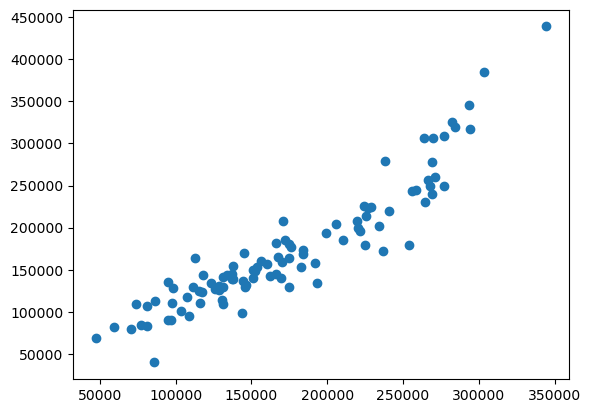

In [24]:
plt.scatter(predictions, Y1)

The plot shows a linearity and correlation between the variables. It will be discused in section 3.3 how well they are.

The second model that will be created, is one with the target transformed into logarithmic scales.

To begin, a copy of the train dataframe is created.

In [25]:
train2 = train.copy()
train2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


After, the transformation into natural logarithm is proceeded.

In [26]:
salePriceColumn = train2['SalePrice']
logSalePrice = salePriceColumn.apply(log)
train2['SalePrice'] = logSalePrice

The variables are instanced.

In [27]:
X2 = train2[cols]
Y2 = train2['SalePrice']
X2 = X2.drop(['SalePrice'], axis = 1)
X2

,OverallQual,GrLivArea,YearBuilt,GarageArea,GarageYrBlt,GarageCars,TotalBsmtSF,YearRemodAdd,FullBath
0,7,1710,2003,548,2003.000000,2,856,2003,2
1,6,1262,1976,460,1976.000000,2,1262,1976,2
2,7,1786,2001,608,2001.000000,2,920,2002,2
3,7,1717,1915,642,1998.000000,3,756,1970,1
4,8,2198,2000,836,2000.000000,3,1145,2000,2
...,...,...,...,...,...,...,...,...,...
95,6,1470,1993,420,1993.000000,2,680,1993,2
96,7,1588,1999,472,1999.000000,2,1588,1999,2
97,4,960,1965,432,1965.000000,1,960,1965,1
98,5,835,1920,366,1920.000000,1,458,1950,1


The model is created

In [28]:
lr = linear_model.LinearRegression()
model2 = lr.fit(X2, Y2)
predictions = model2.predict(X2)


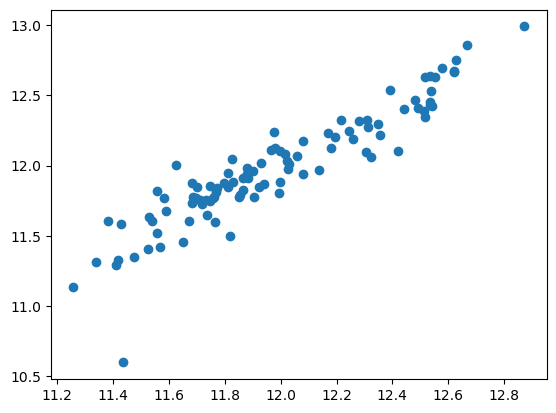

In [29]:
plt.scatter(predictions, Y2)

By looking at the graph, and a priori, it looks as the data is more fitted in this model. 

Then, a third model is created just using the top 2 correlated variables and using algorithmic scale.

In [30]:
cols2 = corr['SalePrice'].sort_values(ascending=False)[0:3].index 
cols2

Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

The variables are instanced and the model is created

In [31]:
X3 = train2[cols2]
Y3 = train2['SalePrice']
X3 = X3.drop(['SalePrice'], axis = 1)

The model is created.

In [32]:
lr = linear_model.LinearRegression()
model3 = lr.fit(X3, Y3)
predictions = model3.predict(X3)


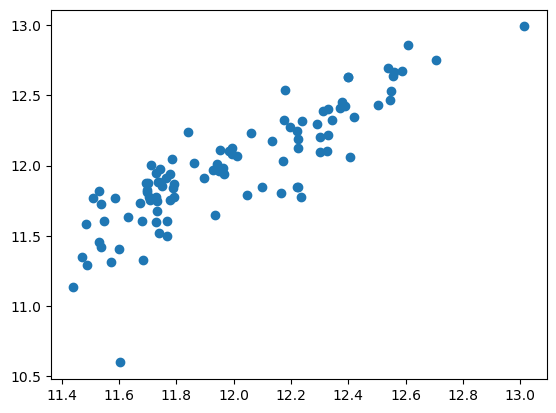

In [33]:
plt.scatter(predictions, Y3)

A priori, this scatterplot doesn't look as fit or correlated as the other ones.

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



To understand how the models are behaving, the data that created them is going to be used to compare if the data fits well in the model created for each. To compare how well they fit, the R-Squared score is going to be used. This score is explained in detail in section 3.1.

In [34]:
print(f"R^2 for model 1 is: {model1.score(X1,Y1)}")

R^2 for model 1 is: 0.8535830612294911


For the first case, the R-squared score is 0.854. This means that the data is well-fitted in its own model, and that the model should be good to predict the house pricing.

In [35]:
print(f"R^2 for model 2 is: {model2.score(X2,Y2)}")

R^2 for model 2 is: 0.8578015192582131


For the second case, the R-squared score is 0.858. This makes sense because this model had the target variable normally distributed, making the model to be more fitted with the data. It is slightly better, though.

In [36]:
print(f"R^2 for model 3 is: {model3.score(X3,Y3)}")

R^2 for model 3 is: 0.743235370614387


In the third case, it can be noticed that the R-squared score has a worse performance compared to the other two. This has to do with the less variables used to create this model, considering there were many numeric variables that had a good correlation to SalePrice. This indicates that the more correlated variables are used to create a model, the better the performance to predict a target should be.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

First, the test dataframe is imported from the csv file. NaN values are searched in case they exist.

In [37]:
test = pd.read_csv('data/jtest.csv')
numeric = test.select_dtypes(include=[np.number])
numeric.isna().sum().sort_values(ascending=False)[0:5]

LotFrontage     22
GarageYrBlt      9
Unnamed: 0       0
WoodDeckSF       0
BedroomAbvGr     0
dtype: int64

In [38]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


The LotFrontagr and GarageYrBlt variables are corrected with the mean values of their data.

In [39]:
numeric['LotFrontage'].describe()

count     78.000000
mean      72.910256
std       24.861270
min       24.000000
25%       60.000000
50%       70.000000
75%       84.000000
max      174.000000
Name: LotFrontage, dtype: float64

In [40]:
numeric['GarageYrBlt'].describe()

count      91.000000
mean     1978.406593
std        25.254253
min      1916.000000
25%      1960.500000
50%      1984.000000
75%      2000.500000
max      2009.000000
Name: GarageYrBlt, dtype: float64

In [41]:
test['LotFrontage'] = test['LotFrontage'].fillna(72.910256)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(1978.406593)

Then, the variables are instanced and compared to the different models.

In [42]:
X = test[cols]
Y = test['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,YearBuilt,GarageArea,GarageYrBlt,GarageCars,TotalBsmtSF,YearRemodAdd,FullBath
0,6,1610,1977,480,1977.000000,2,1610,2001,2
1,6,1732,1985,476,1985.000000,2,741,1985,2
2,5,1535,1979,410,1979.000000,2,0,1979,2
3,7,1226,2009,740,2009.000000,3,1226,2009,2
4,7,1818,1931,240,1951.000000,1,1040,1950,1
...,...,...,...,...,...,...,...,...,...
95,6,1456,1976,440,1976.000000,2,855,1976,2
96,7,1726,2007,786,2007.000000,3,1726,2007,2
97,8,3112,1918,795,1918.000000,2,1360,1990,2
98,6,2229,1912,0,1978.406593,0,755,1950,1


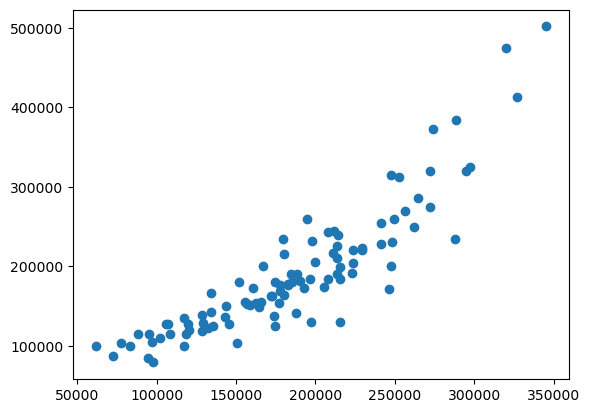

In [43]:
predictions = model1.predict(X)
plt.scatter(predictions, Y)

In [44]:
print(f"R^2 is: {model1.score(X,Y)}")

R^2 is: 0.7670686366401984


The data for testing is used in the first model created for this project. The result shows that the R-Squared score was lower than when it was compared with the same data to create the model. This is expected, and the result is still very good. The model is still good at predicting the target variable. 

Now, the test data will be compared with the second model. In order to do so, the transormation to logarithmic scale has to be done.

In [45]:
test2 = test.copy()
salePriceColumn = test2['SalePrice']
logSalePrice = salePriceColumn.apply(log)
test2['SalePrice'] = logSalePrice

In [46]:
X = test2[cols]
Y = test2['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

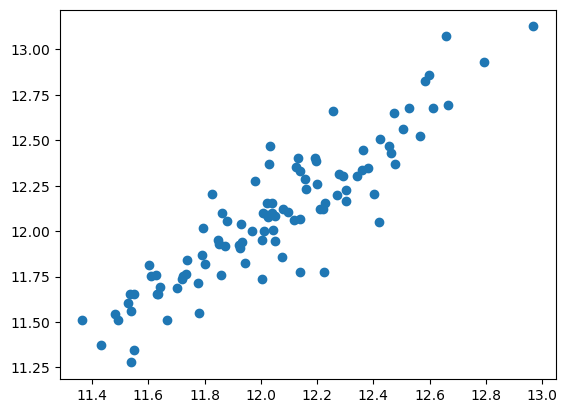

In [47]:
predictions = model2.predict(X)
plt.scatter(predictions, Y)

In [48]:
print(f"R^2 is: {model2.score(X,Y)}")

R^2 is: 0.811438102497561


The R-squared score for the test on the second model was better than the one for the first model, indicating a 0.811 R-squared score. This indicates a strong prediction for the pricing of the properties. It makes sense that this one performed better than the first one with the test data, because the transformation to logarithm made the skewness of the distribution of the variable closer to zero, and it is important to remember that linear regressions are affected by outliers, and tailed-distribution can provoke that data is taken as outliers. This is why it's important to transform the data when there is a tailed-distribution.

Finally, the test data will be tested with the third model.

In [49]:
X = test2[cols2]
Y = test2['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

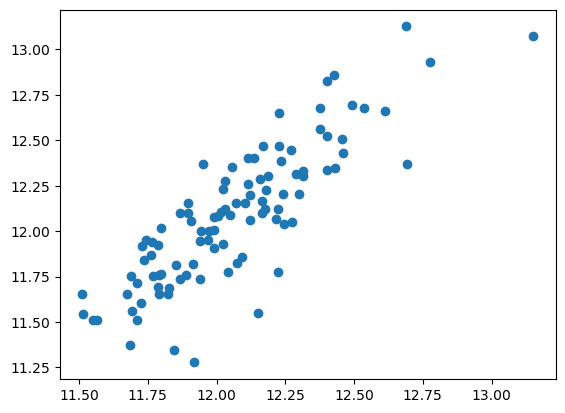

In [50]:
predictions = model3.predict(X)
plt.scatter(predictions, Y)

In [51]:
print(f"R^2 is: {model3.score(X,Y)}")

R^2 is: 0.7055792695454015


As it can be seen here, it is clear that the data is not as fitted as the other ones just by looking at the scatterplot. The R-squared score is 0.706. While still good for prediction, is not as strong as the first or second one. Even though the target is in a Gaussian distribution in this model, there are just two dependent variables taken to create this linear regression. This indicates that, while it's important to adjust the distribution of the target, it's very important to take as many correlated independent variables as possible to create a good model that has a strong R-Squared score, because that model is taking account the many variables that are shaping the target outcome.

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?



The most important conclusions that can be drawned from this project are the following ones:

- When exploring the data, it's of extreme importance to understand what is what needs to be predicted by the model. When that is covered, it's also important to see how distributed the target variable is, because the skewness of a distribution can be harmful for methods like the linear regression model. 
- It is important to fill or drop columns that have too many NaN values, as they make some algorithm impossible to create, like the linear regression model. 
- Correlation is an important concept that indicates how strongly related are two variables. The Pearson's correlation coefficient is easy to compute by the pandas library and the seaborn library helps in showing many correlation coefficients quickly to make conclusions about the relationships of the variables. 
- The R-Squared score, or coefficient of determination, is an important score to understand if the data fits well a model and is strong and accurate to predict a target outcome. 
-  The independent variables that are more correlated to the target are the ones that need to be included to create a model with better performance of the R-Squared score, as these variables are shaping the target outcome and they have to be taken account. 
- It is important to understand the theory of the model that is used, to have a bigger picture of how the model can be affected by outliers or other statistics concept, like the covariance, correlation, or distribution of a feature.
- Finally, for a linear regression model, the best outcome was when many correlated independent variables were taken account and when the skewness of the target was more normally distributed.

Other steps to create a better model could have been added, like the transformation of discrete variables into numeric ones, to see if they are also correlated with the target. In that case, the model can be even more accurate and strong in predicting an outcome.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

- Bruce, Peter. Practical Statistics for Data Scientists. 2017. 24 - 60
- Müller, A. Introduction to Machine Learning with Python. 2017. 45 - 49.
- Joshi, P. Python Machine Learning Cookbook. 2016. 11 - 12.
- Fernando, J. "R-Squared: Definition, Calculation Formula, Uses, and Limitations" Investopedia. Dotdash Meredith, 2023. www.investopedia.com/
- Chawla, A. "A Common Misconception About Log Transformation" Daily Dose of Data Science. Substack, 2023. www.blog.dailydoseofds.com/
